## Car Price Assignment_1

Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.  

Geely Auto have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market.
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 


Based on the available data set the buisness objective is :

- To identify the variables which are significant in predicting the price of a car

- To create a linear model that quantitatively relates car price with available independent variables

- To know the accuracy of the model, i.e. how well these variables can describe the car price.

### Importing Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm  # Importing statsmodels
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [4]:
# Importing CarPrice_Assignment.csv
car_df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
# Looking at the first five rows
car_df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

### Understanding Data and Exploratory Data Analysis of various Columns

In [6]:
# Understanding type of values stored in the columns
#No NA or null values in any column
100 * (car_df.isnull().sum() / len(car_df.index))
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
#symboling column where value indicates assigned insurance risk rating
# There are 6 values (from 3 to -2) so as mentioned in the data dictonary will be treating this as categorical variable
# although it's data type is integer. Here -2 indicates pretty safe interms of insurance risk rating and +3 indicates very risky
# very risky rating
print(car_df.symboling.unique())
print(car_df.symboling.astype('category').value_counts())

[ 3  1  2  0 -1 -2]
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


In [8]:
# fueltype column
# There are 2 values (gas and diesel)for categorical variable fueltype
print(car_df.fueltype.astype('category').describe())
car_df.fueltype.astype('category').value_counts()

count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object


gas       185
diesel     20
Name: fueltype, dtype: int64

In [9]:
# Understanding aspiration column
# There are 2 values (std and turbo)for categorical variable aspiration
# https://en.wikipedia.org/wiki/Naturally_aspirated_engine 
# An internal combustion engine in which oxygen intake depends solely on atmospheric pressure is Standard 'std' or 
# Naturally aspirated engine whereas those which do rely on forced induction through a turbocharger are termed here 
# as 'turbo'
print(car_df['aspiration'].unique())
print(car_df['aspiration'].value_counts())

['std' 'turbo']
std      168
turbo     37
Name: aspiration, dtype: int64


In [10]:
# doornumber column categorical variable - Number of doors in a car has 2 values('four' and 'two')
print(car_df['doornumber'].unique())
print(car_df['doornumber'].value_counts())

['two' 'four']
four    115
two      90
Name: doornumber, dtype: int64


In [11]:
# carbody column categorical variable - Type of body the car (It has 5 different values)
print(car_df['carbody'].unique())
print(car_df['carbody'].value_counts())


['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


In [12]:
# drivewheel column categorical variable
# https://en.wikipedia.org/wiki/Drive_wheel  : A drive wheel is a wheel of a motor vehicle that transmits force, 
# transforming torque into tractive force from the tires to the road, causing the vehicle to move. 
# Drive wheel column values :  fwd -> Front-wheel drive , rwd ->Rear-wheel drive , 4wd -> Four-wheel drive
print(car_df['drivewheel'].unique())
print(car_df['drivewheel'].value_counts())

['rwd' 'fwd' '4wd']
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [13]:
# enginelocation column categorical variable - Location of year engine (front and rear)
print(car_df['enginelocation'].unique())
print(car_df['enginelocation'].value_counts())

['front' 'rear']
front    202
rear       3
Name: enginelocation, dtype: int64


count    205.000000
mean      98.756585
std        6.021776
min       86.600000
50%       97.000000
75%      102.400000
90%      107.900000
98%      114.200000
max      120.900000
Name: wheelbase, dtype: float64


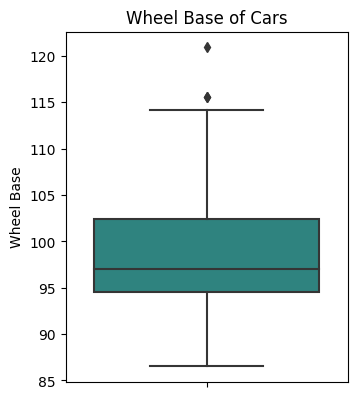

Inference:
	For 'wheelbase' column median is at 97.0 with min at 86.6 and max value at 120.9. 
 	50% of values between 25-75% percentile  are in the range between 94.5-102.4 and there are couple of outlier


In [14]:
# wheelbase column quantitative variable - 
#https://en.wikipedia.org/wiki/Wheelbase : In both road and rail vehicles, the wheelbase is the distance between the
#centers of the front and rear wheels.
print(car_df['wheelbase'].describe(percentiles=[0.75, 0.90, 0.98]))

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['wheelbase'], palette='viridis')
plt.ylabel('Wheel Base')
plt.title('Wheel Base of Cars')
plt.show()

print('Inference:\n\tFor \'wheelbase\' column median is at 97.0 with min at 86.6 and max value at 120.9. \n' ,
      '\t50% of values between 25-75% percentile  are in the range between 94.5-102.4 and there are couple of outlier')

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
50%      173.200000
75%      183.100000
90%      188.800000
98%      199.568000
max      208.100000
Name: carlength, dtype: float64


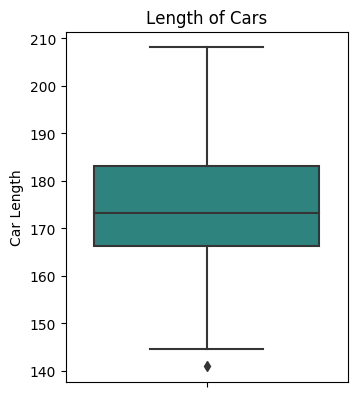

Inference:
	For 'carlength' column median is at 173.20 with min at 141.1 and max value at 208.1 with 1 outlier at lower end.


In [15]:
# carlength column quantitative variable - length of car
print(car_df['carlength'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['carlength'], palette='viridis')
plt.ylabel('Car Length')
plt.title('Length of Cars')
plt.show()
print('Inference:\n\tFor \'carlength\' column median is at 173.20 with min at 141.1 and max value at 208.1 with 1 outlier at lower end.')

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
50%       65.500000
75%       66.900000
90%       68.640000
98%       71.676000
max       72.300000
Name: carwidth, dtype: float64


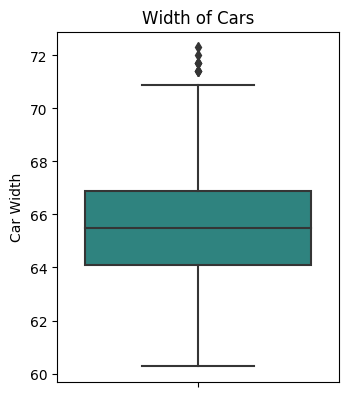

Inference:
	For 'carwidth' column median is at 65.5 with min at 60.3 and max value at 72.3 with couple of outliers.


In [16]:
# carwidth column quantitative variable - width of car
print(car_df['carwidth'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['carwidth'], palette='viridis')
plt.ylabel('Car Width')
plt.title('Width of Cars')
plt.show()
print('Inference:\n\tFor \'carwidth\' column median is at 65.5 with min at 60.3 and max value at 72.3 with couple of outliers.')

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
50%       54.100000
75%       55.500000
90%       56.620000
98%       59.068000
max       59.800000
Name: carheight, dtype: float64


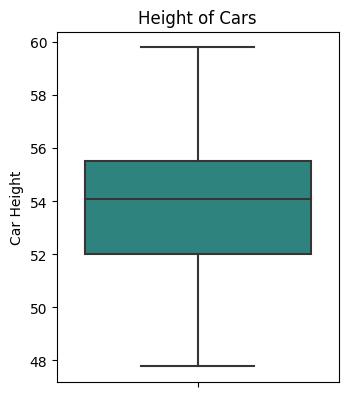

Inference:
	 For 'carheight' column median is at 54.1 with min at 47.8 and max value at 59.8


In [17]:
# carheight column quantitative variable - Height of car
print(car_df['carheight'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['carheight'], palette='viridis')
plt.ylabel('Car Height')
plt.title('Height of Cars')
plt.show()
print('Inference:\n\t For \'carheight\' column median is at 54.1 with min at 47.8 and max value at 59.8')

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
50%      2414.000000
75%      2935.000000
90%      3230.000000
98%      3768.400000
max      4066.000000
Name: curbweight, dtype: float64


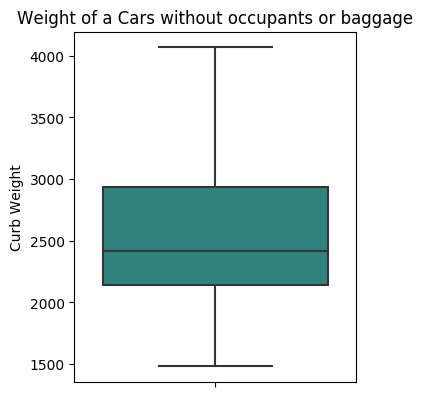

Inference:
	 For 'curbweight' column median is at 2414.0 with min at 1488.0 and max value at 4066.0


In [18]:
# curbweight column quantitative variable - The weight of a car without occupants or baggage
print(car_df['curbweight'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['curbweight'], palette='viridis')
plt.ylabel('Curb Weight')
plt.title('Weight of a Cars without occupants or baggage')
plt.show()
print('Inference:\n\t For \'curbweight\' column median is at 2414.0 with min at 1488.0 and max value at 4066.0')

In [19]:
# enginetype column categorical variable - Type of engine
# dohc (Dual OverHead Cam), dohcv (Dual OverHead Cam and Valve), l (L engine)
# ohc (OverHead Cam), ohcf (OverHead Cam and Valve F engine), ohcv (OverHead Cam and Valve) and rotor (Rotary engine)
print(car_df['enginetype'].unique())
print(car_df['enginetype'].value_counts())

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


In [20]:
#cylindernumber column categorical variable - cylinders placed in the car
print(car_df['cylindernumber'].unique())
print(car_df['cylindernumber'].value_counts())


['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


count    205.000000
mean     126.907317
std       41.642693
min       61.000000
50%      120.000000
75%      141.000000
90%      181.000000
98%      256.080000
max      326.000000
Name: enginesize, dtype: float64


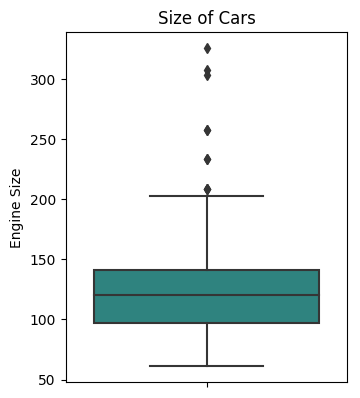

Inference:
	 For 'enginesize' column median is at 120.0 with min at 61.0 and max value at 326.0 There are couple of oultiers


In [21]:
# enginesize column quantitative variable - Size of car
print(car_df['enginesize'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['enginesize'], palette='viridis')
plt.ylabel('Engine Size')
plt.title('Size of Cars')
plt.show()
print('Inference:\n\t For \'enginesize\' column median is at 120.0 with min at 61.0 and max value at 326.0',
     'There are couple of oultiers')

In [22]:
#fuelsystem column categorical variable - Fuel System of Car
print(car_df['fuelsystem'].unique())
print(car_df['fuelsystem'].value_counts())

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


count    205.000000
mean       3.329756
std        0.270844
min        2.540000
50%        3.310000
75%        3.580000
90%        3.672000
98%        3.780000
max        3.940000
Name: bore, dtype: float64


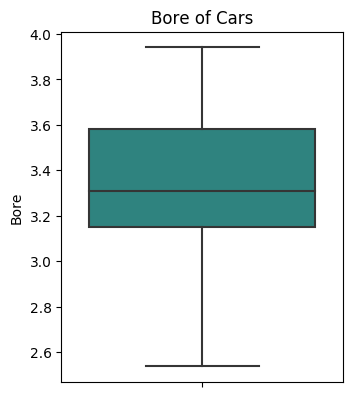

Inference:
	For 'bore' column median is at 3.31 with min at 2.54 and max value at 3.94
 	There are no oultier as per the 	box plot


In [23]:
# boreratio column 
# As the source of data is https://archive.ics.uci.edu/ml/datasets/Automobile
# the values of the column are for bore and not 'bore ratio' 
# Hence renaming the column to bore as the values are for bore as per the source link
car_df.rename(columns={"boreratio": "bore"}, inplace=True)

# bore column quantitative variable - The bore or cylinder bore is a part of a piston engine. 
# The bore also represents the size, in terms of diameter, of the cylinder in which a piston travels. 
print(car_df['bore'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['bore'], palette='viridis')
plt.ylabel('Bore')
plt.title('Bore of Cars')
plt.show()
print('Inference:\n\tFor \'bore\' column median is at 3.31 with min at 2.54 and max value at 3.94\n',
     '\tThere are no oultier as per the \tbox plot')


count    205.000000
mean       3.255415
std        0.313597
min        2.070000
50%        3.290000
75%        3.410000
90%        3.540000
98%        3.896800
max        4.170000
Name: stroke, dtype: float64


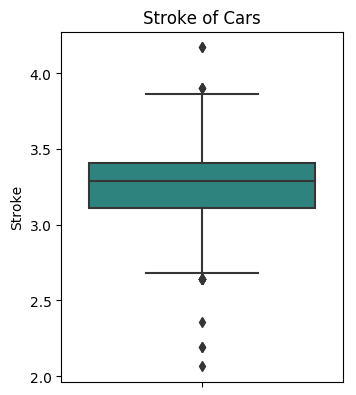

Inference:
	For 'stroke' column median is at 3.29 with min at 2.07 and max value at 4.17 
 	There are couple of oultiers on both minimum and maximum values


In [24]:
# stroke column quantitative variable - Stroke or Volume inside the engine
print(car_df['stroke'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['stroke'], palette='viridis')
plt.ylabel('Stroke')
plt.title('Stroke of Cars')
plt.show()
print('Inference:\n\tFor \'stroke\' column median is at 3.29 with min at 2.07 and max value at 4.17 \n',
     '\tThere are couple of oultiers on both minimum and maximum values')

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
50%        9.000000
75%        9.400000
90%       10.940000
98%       22.976000
max       23.000000
Name: compressionratio, dtype: float64


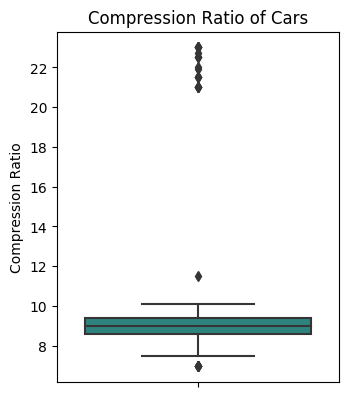

Inference:
	For 'compressionratio' column median is at 9.0 with min at 7.0 and max value at 23.0 
 	There are couple of oultiers on both minimum and maximum values


In [25]:
# compressionratio column quantitative variable - compression ratio of car
print(car_df['compressionratio'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['compressionratio'], palette='viridis')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio of Cars')
plt.show()
print('Inference:\n\tFor \'compressionratio\' column median is at 9.0 with min at 7.0 and max value at 23.0 \n',
     '\tThere are couple of oultiers on both minimum and maximum values')


count    205.000000
mean     104.117073
std       39.544167
min       48.000000
50%       95.000000
75%      116.000000
90%      160.000000
98%      206.440000
max      288.000000
Name: horsepower, dtype: float64


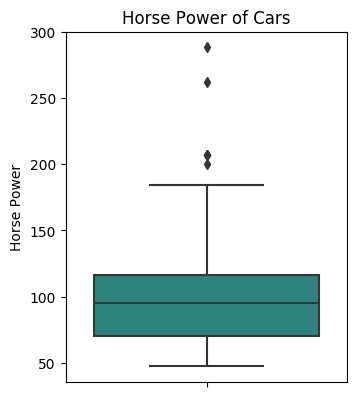

Inference:
	For 'horsepower' column median is at 95.0 with min at 48.0 and max value at 288.0 
 	There are couple of oultiers on the higher values


In [26]:
# horsepower column quantitative variable - horsepower(The power an engine produces) of car
print(car_df['horsepower'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['horsepower'], palette='viridis')
plt.ylabel('Horse Power')
plt.title('Horse Power of Cars')
plt.show()
print('Inference:\n\tFor \'horsepower\' column median is at 95.0 with min at 48.0 and max value at 288.0 \n',
     '\tThere are couple of oultiers on the higher values')

count     205.000000
mean     5125.121951
std       476.985643
min      4150.000000
50%      5200.000000
75%      5500.000000
90%      5780.000000
98%      6000.000000
max      6600.000000
Name: peakrpm, dtype: float64


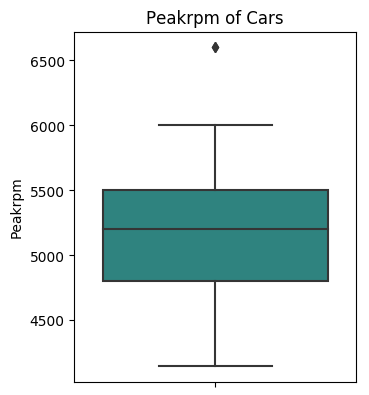

Inference:
	For 'peakrpm' column median is at 5200.0 with min at 4150.0 and max value at 6600.0 
 	There is an oultier at maximum value


In [27]:
# peakrpm column quantitative variable - Car peak rpm
print(car_df['peakrpm'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['peakrpm'], palette='viridis')
plt.ylabel('Peakrpm')
plt.title('Peakrpm of Cars')
plt.show()
print('Inference:\n\tFor \'peakrpm\' column median is at 5200.0 with min at 4150.0 and max value at 6600.0 \n',
     '\tThere is an oultier at maximum value')

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
50%       24.000000
75%       30.000000
90%       31.600000
98%       38.000000
max       49.000000
Name: citympg, dtype: float64


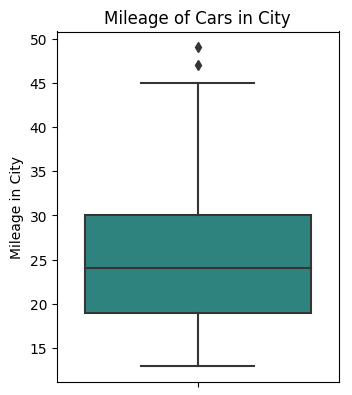

Inference:
	For 'citympg' column median is at 24.0 with min at 13.0 and max value at 49.0 
 	There are couple oultiers around maximum value


In [28]:
# citympg column quantitative variable - Mileage in City
print(car_df['citympg'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['citympg'], palette='viridis')
plt.ylabel('Mileage in City')
plt.title('Mileage of Cars in City')
plt.show()
print('Inference:\n\tFor \'citympg\' column median is at 24.0 with min at 13.0 and max value at 49.0 \n',
     '\tThere are couple oultiers around maximum value')

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
50%       30.000000
75%       34.000000
90%       38.000000
98%       46.920000
max       54.000000
Name: highwaympg, dtype: float64


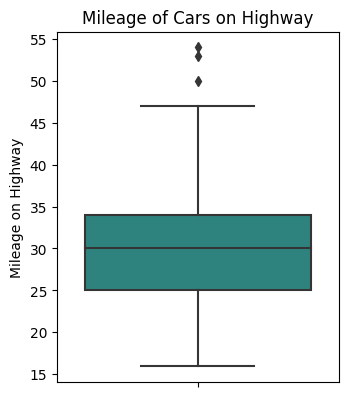

Inference:
	For 'highwaympg' column median is at 30.0 with min at 16.0 and max value at 54.0 
 	There are couple oultiers around maximum value


In [29]:
# highwaympg column quantitative variable - Mileage on Highway
print(car_df['highwaympg'].describe(percentiles=[0.75,0.90, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['highwaympg'], palette='viridis')
plt.ylabel('Mileage on Highway')
plt.title('Mileage of Cars on Highway')
plt.show()
print('Inference:\n\tFor \'highwaympg\' column median is at 30.0 with min at 16.0 and max value at 54.0 \n',
     '\tThere are couple oultiers around maximum value')


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
50%      10295.000000
75%      16503.000000
94%      31552.120000
98%      36809.600000
max      45400.000000
Name: price, dtype: float64


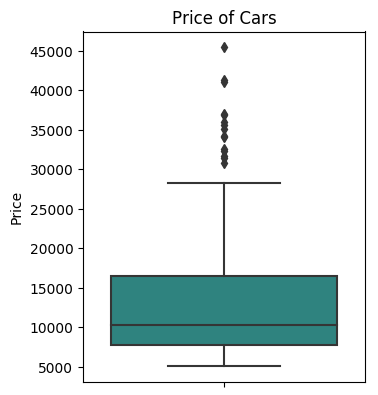

Inference:
	For 'price' column median is at 10295.0 with min at 5118.0 and max value at 45400.0 
 	There are clearly some outliers on the higher end of the price 


In [30]:
# price column quantitative variable - Price of Car
print(car_df['price'].describe(percentiles=[0.75,0.94, 0.98]))
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=car_df['price'], palette='viridis')
plt.ylabel('Price')
plt.title('Price of Cars')
plt.show()
print('Inference:\n\tFor \'price\' column median is at 10295.0 with min at 5118.0 and max value at 45400.0 \n',
     '\tThere are clearly some outliers on the higher end of the price ')

### Derived Varibles

In [31]:
print(car_df.info())
# Adding derived variables to car_df data frame

# 1. stroke-bore-ratio : http://achatespower.com/stroke-to-bore/ Engine friction is affected by the stroke-to-bore ratio because of two competing effects: 
# crankshaft bearing friction and power-cylinder friction. It acts as factor in engine efficiency
car_df['stroke_bore_ratio'] = car_df['stroke'] / car_df['bore']
print(car_df.stroke_bore_ratio.head())

# 2. Car Mileage which is average mileage of car in city and highway
car_df['carmileage'] = (car_df['citympg'] + car_df['highwaympg']) / 2
print(car_df.carmileage.head())

# 3. Engine displacement  : https://en.wikipedia.org/wiki/Engine_displacement
# Engine displacement is the combined swept volume of the pistons inside the cylinders of an engine.
# Displacement is an important factor, as it has a direct impact on an engine's power output, fuel efficiency, and 
# in some countries, how a vehicle is taxed
# Engine displacement = (π/4) * bore ^ 2 * stroke * number of cylinders
# Rounding (π/4) to 0.7854
car_df['engine_displacement'] = round(( 0.7854 * (car_df['bore']**2) * car_df['stroke'] * (car_df['cylindernumber'].map({'two': 2, 'three': 3,'four': 4, 'five': 5,'six': 6, 'eight': 8,'twelve': 12}))), 2)
print(car_df.engine_displacement.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
bore                205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Data Cleaning and Exploratory Data Analysis on Qunatitative/Numeric variables


In [32]:
# We can drop car_ID column from data frame since as per the Data dictonary is unique id for each observation and 
# is not related/feature of car
print("Dropping car_ID as it unique id for each observation and related/feature of car which could influence the price")
try:
    car_df.drop('car_ID', axis=1, inplace=True)
except:
    print('Column already dropped.')

Dropping car_ID as it unique id for each observation and related/feature of car which could influence the price


In [33]:
# Like all othe Categorical variables in the data set converting treated 'symboling' to data type Object
car_df['symboling'] = car_df.symboling.astype('object')
car_df.info()
car_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
symboling              205 non-null object
CarName                205 non-null object
fueltype               205 non-null object
aspiration             205 non-null object
doornumber             205 non-null object
carbody                205 non-null object
drivewheel             205 non-null object
enginelocation         205 non-null object
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
enginetype             205 non-null object
cylindernumber         205 non-null object
enginesize             205 non-null int64
fuelsystem             205 non-null object
bore                   205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non

symboling                   CarName fueltype aspiration doornumber  \
0         3        alfa-romero giulia      gas        std        two   
1         3       alfa-romero stelvio      gas        std        two   
2         1  alfa-romero Quadrifoglio      gas        std        two   
3         2               audi 100 ls      gas        std       four   
4         2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  \
0  convertible        rwd          front       88.6      168.8   
1  convertible        rwd          front       88.6      168.8   
2    hatchback        rwd          front       94.5      171.2   
3        sedan        fwd          front       99.8      176.6   
4        sedan        4wd          front       99.4      176.6   

          ...           stroke  compressionratio  horsepower peakrpm citympg  \
0         ...             2.68               9.0         111    5000      21   
1         ...             2.68               9.0         111    5000      21   
2         ...             3.47               9.0         154    5000      19   
3         ...             3.40              10.0         102    5500      24   
4         ...             3.40               8.0         115    5500      18   

   highwaympg    price  stroke_bore_ratio  carmileage  engine_displacement  
0          27  13495.0           0.772334        24.0               101.38  
1          27  16500.0           0.772334        24.0               101.38  
2          26  16500.0           1.294776        22.5               117.45  
3          30  13950.0           1.065831        27.0               108.70  
4          22  17450.0           1.065831        20.0               135.87  

[5 rows x 28 columns]

In [34]:
#Creating seperate data frame for Numeric/Quantitavive variable for further EDA such as correlation, pair plot etc.
car_numeric_df = car_df.select_dtypes(exclude=['object'])
car_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
enginesize             205 non-null int64
bore                   205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
stroke_bore_ratio      205 non-null float64
carmileage             205 non-null float64
engine_displacement    205 non-null float64
dtypes: float64(11), int64(6)
memory usage: 27.3 KB


In [35]:
car_numeric_df.describe()

wheelbase   carlength    carwidth   carheight   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       enginesize        bore      stroke  compressionratio  horsepower  \
count  205.000000  205.000000  205.000000        205.000000  205.000000   
mean   126.907317    3.329756    3.255415         10.142537  104.117073   
std     41.642693    0.270844    0.313597          3.972040   39.544167   
min     61.000000    2.540000    2.070000          7.000000   48.000000   
25%     97.000000    3.150000    3.110000          8.600000   70.000000   
50%    120.000000    3.310000    3.290000          9.000000   95.000000   
75%    141.000000    3.580000    3.410000          9.400000  116.000000   
max    326.000000    3.940000    4.170000         23.000000  288.000000   

           peakrpm     citympg  highwaympg         price  stroke_bore_ratio  \
count   205.000000  205.000000  205.000000    205.000000         205.000000   
mean   5125.121951   25.219512   30.751220  13276.710571           0.984473   
std     476.985643    6.542142    6.886443   7988.852332           0.123811   
min    4150.000000   13.000000   16.000000   5118.000000           0.632948   
25%    4800.000000   19.000000   25.000000   7788.000000           0.936464   
50%    5200.000000   24.000000   30.000000  10295.000000           1.016760   
75%    5500.000000   30.000000   34.000000  16503.000000           1.069486   
max    6600.000000   49.000000   54.000000  45400.000000           1.294776   

       carmileage  engine_displacement  
count  205.000000           205.000000  
mean    27.985366           126.048146  
std      6.666038            44.138197  
min     15.000000            41.960000  
25%     22.500000            96.870000  
50%     27.000000           111.600000  
75%     32.000000           144.090000  
max     51.500000           325.980000

<Figure size 2500x2500 with 0 Axes>

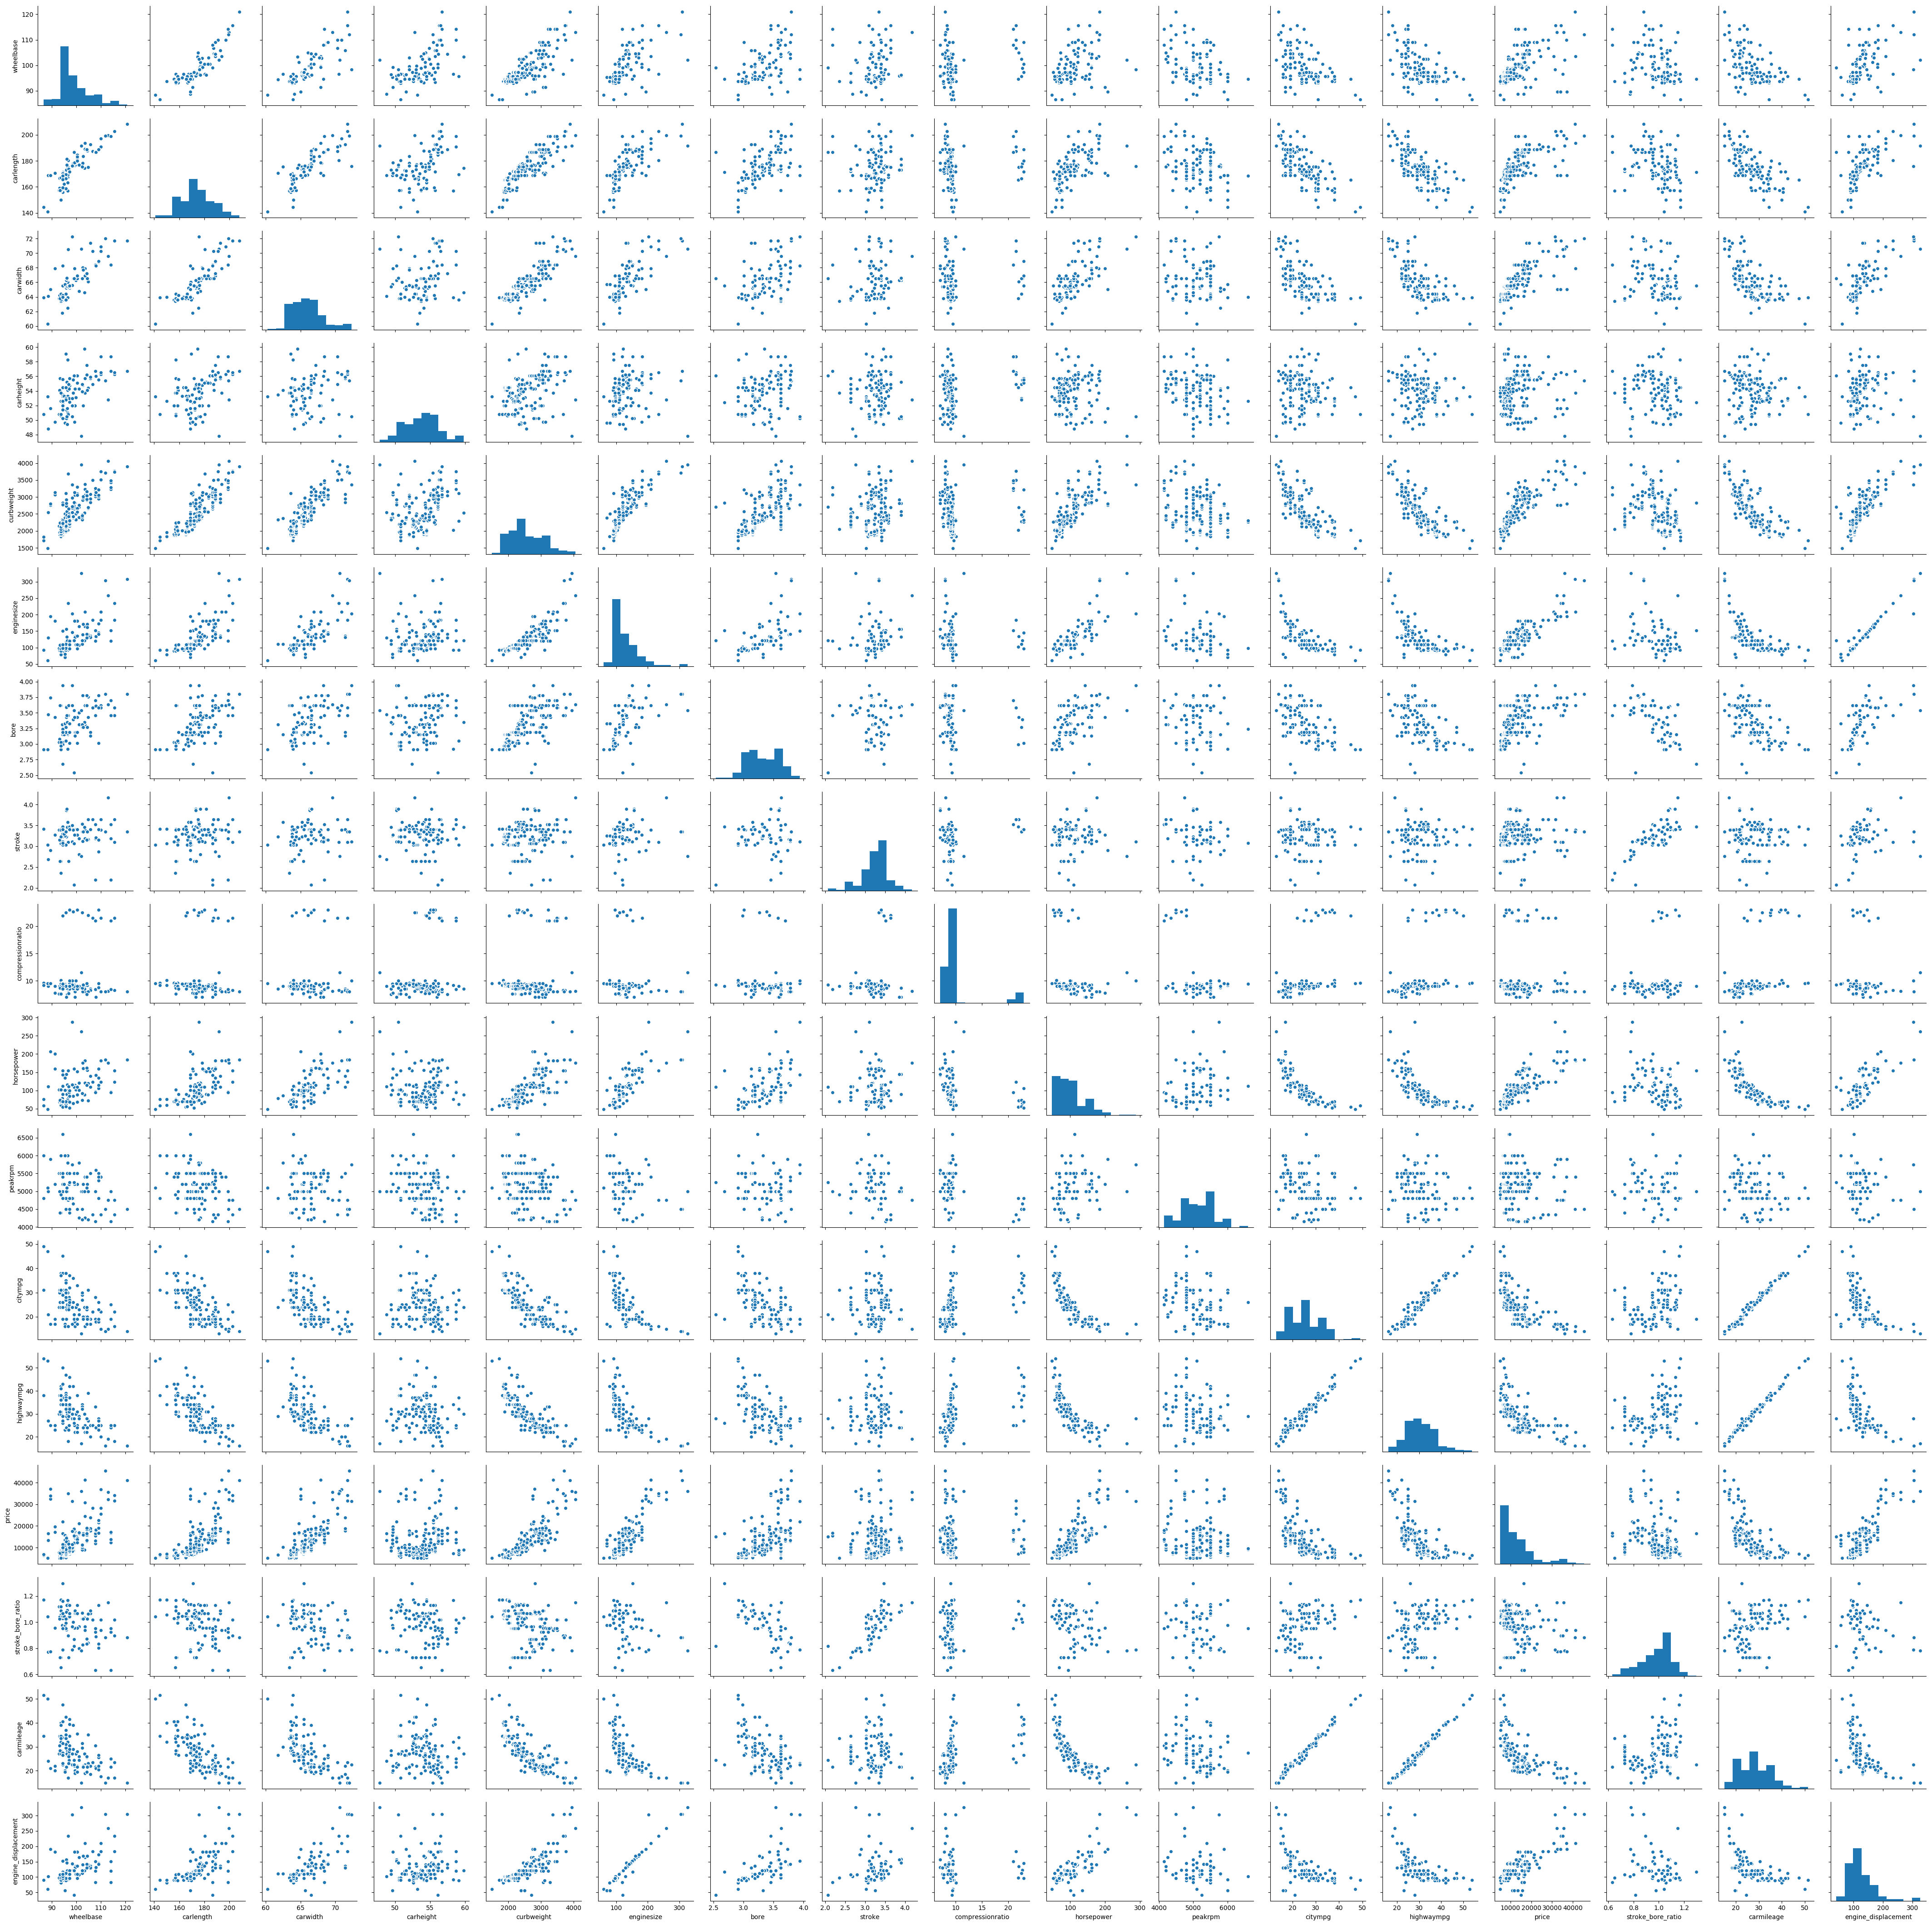

In [36]:
# Creating pair plot fot numeric/quantitative variables
%matplotlib inline
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(25,25))
sns.pairplot(car_numeric_df,kind='scatter')
plt.show()

### Creating Heat Map (Correlation Matrix)

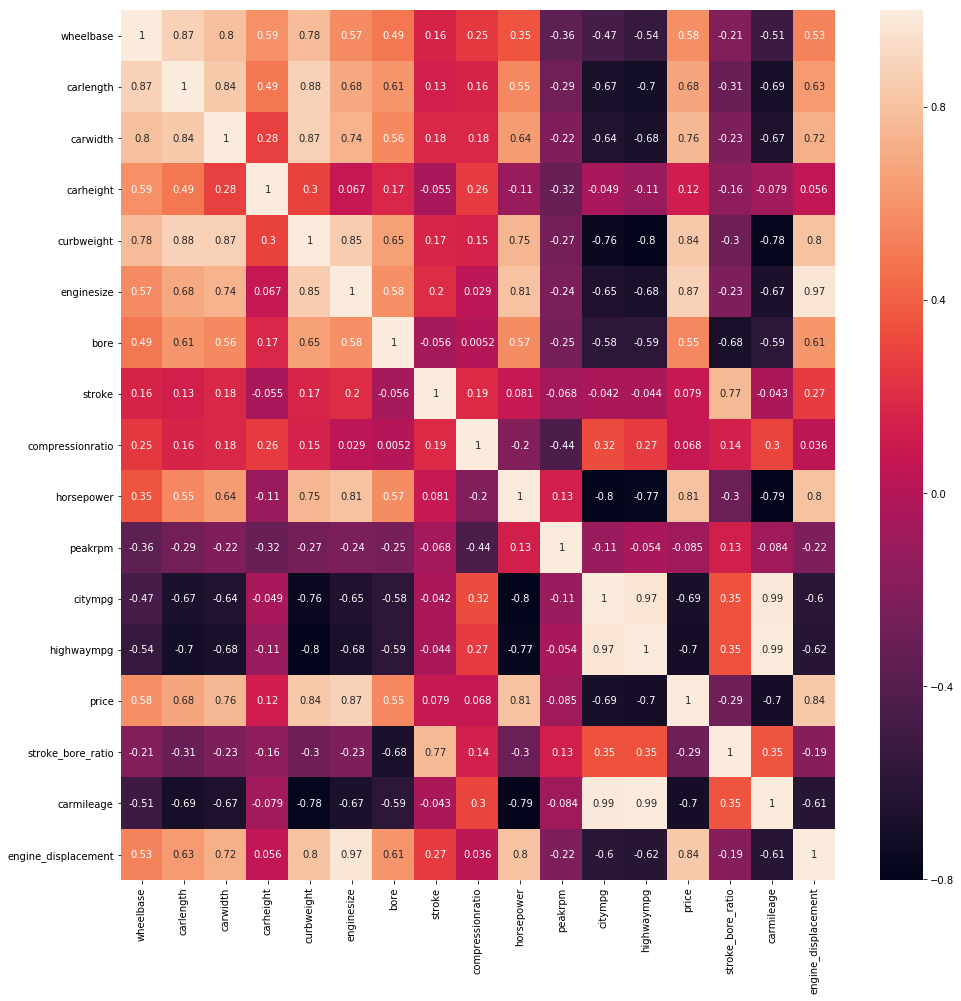

In [37]:
# correlation matrix for numeric variables 
%matplotlib inline
plt.figure(figsize = (16,16))     # Size of the figure
sns.heatmap(car_numeric_df.corr(),annot = True)

Some Observstions from above Heat Map :
- dependent variable Price has high positive coorelation with independent variables wheelbase, carlength, carwidth, curbweight, enginesize, bore, horsepower and engine_displacement

- dependent variable Price has high negative coorelation with independent predictor variables citympg, highwaympg and carmilege : seems as the price of the car goes up the there is high probability of carmileage to go down.

- engine_displacement has very high positive coorelation(equal or more than 0.8) with curbweight ,enginesize , horsepower,price

- carmileage as expected has very high positive coorelation( 0.99) with citympg and highwaympg ,will keep a close look at them while model building for collinearity whereas it has very high negative coorelation(more than -0.7) with curbweight and horsepower

- wheelbase has very high positive coorelation(equal or more than 0.75) with carlength, carwidth, curbweight

- enginesize has very high positive coorelation(equal or more than 0.8) with curbweight and horsepower

In [38]:
#Data cleaning CarName column
car_df['CarName'] = car_df['CarName'].str.lower()
car_df.CarName.head()
#Getting name of the car company as it is at start before the space 
car_df['car_company_name'] = car_df['CarName'].str.split(" ").str[0]
print(car_df['car_company_name'].unique())
print(car_df['car_company_name'].value_counts())

#Some of the company name are misspelled below function for fixing them
def fix_company_names(company_name):
    if company_name == 'vokswagen' or company_name == 'vw':
        return 'volkswagen'
    elif company_name == 'porcshce':
        return 'porsche'
    elif company_name == 'maxda':
        return 'mazda'
    elif company_name == 'toyouta':
        return 'toyota'
    else:
        return company_name

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
maxda           2
vw              2
porcshce        1
vokswagen       1
mercury         1
toyouta         1
Name: car_company_name, dtype: int64


In [39]:
#Fixing the car_company_name column for misspelled company names
car_df['car_company_name'] = car_df.car_company_name.apply(lambda x : fix_company_names(x))
print(car_df['car_company_name'].unique())
print(car_df['car_company_name'].value_counts())

#Dropping CarName column as we have extracted car company name to column 'car_company_name' 
# and since car model name is not considered for building column so we can drop this column
print("Dropping CarName column")
try:
    car_df.drop('CarName', axis=1, inplace=True)
except:
    print('Column already dropped.')
car_df.info()


['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company_name, dtype: int64
Dropping CarName column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
symboling              205 non-null object
fueltype               205 non-null object
aspiration             205 non-null object
doornumber             205 non-null object
carbody                205 non-null object
drivewheel  

### Data Preparation

Converting Categorical Variable to Numeric/Quantitative for model building 

- In dataset there are some columns with only 2 distinct categorical values

- Converting them to 1s and 0s

- For Categorical variables with more than 2 distinct values -> using dummy variables for converting them to Numeric

In [40]:
# Converting Categorical variables to Numeric
car_df['fueltype'] = car_df['fueltype'].map({'gas': 1, 'diesel': 0})
car_df['aspiration'] = car_df['aspiration'].map({'std': 1, 'turbo': 0})
car_df['doornumber'] = car_df['doornumber'].map({'four': 1, 'two': 0})
car_df['enginelocation'] = car_df['enginelocation'].map({'front': 1, 'rear': 0})

In [41]:
#Remaining categorical variables :
# 'symboling','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','car_company_name'

car_df = pd.get_dummies(data=car_df, columns=['symboling','carbody','drivewheel','enginetype','cylindernumber',
                                              'fuelsystem','car_company_name'],drop_first=True)
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
fueltype                       205 non-null int64
aspiration                     205 non-null int64
doornumber                     205 non-null int64
enginelocation                 205 non-null int64
wheelbase                      205 non-null float64
carlength                      205 non-null float64
carwidth                       205 non-null float64
carheight                      205 non-null float64
curbweight                     205 non-null int64
enginesize                     205 non-null int64
bore                           205 non-null float64
stroke                         205 non-null float64
compressionratio               205 non-null float64
horsepower                     205 non-null int64
peakrpm                        205 non-null int64
citympg                        205 non-null int64
highwaympg                     205 non-null int64
price                          

### Rescaling the Features 

As we can see for various features/variables the scales are very different for example compare for bore,rpm, price etc.  
So it is extremely important to rescale the variables so that they have a comparable scale before model building. 

- So rescaling all the variables using Normalisation method (min-max scaling)

In [42]:
#Normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying Normalisation function to all columns in car_df data frame
car_df = car_df.apply(normalize) 
car_df.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
0       1.0         1.0         0.0             1.0   0.058309   0.413433   
1       1.0         1.0         0.0             1.0   0.058309   0.413433   
2       1.0         1.0         0.0             1.0   0.230321   0.449254   
3       1.0         1.0         1.0             1.0   0.384840   0.529851   
4       1.0         1.0         1.0             1.0   0.373178   0.529851   

   carwidth  carheight  curbweight  enginesize           ...            \
0  0.316667   0.083333    0.411171    0.260377           ...             
1  0.316667   0.083333    0.411171    0.260377           ...             
2  0.433333   0.383333    0.517843    0.343396           ...             
3  0.491667   0.541667    0.329325    0.181132           ...             
4  0.508333   0.541667    0.518231    0.283019           ...             

   car_company_name_nissan  car_company_name_peugeot  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   car_company_name_plymouth  car_company_name_porsche  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   car_company_name_renault  car_company_name_saab  car_company_name_subaru  \
0                       0.0                    0.0                      0.0   
1                       0.0                    0.0                      0.0   
2                       0.0                    0.0                      0.0   
3                       0.0                    0.0                      0.0   
4                       0.0                    0.0                      0.0   

   car_company_name_toyota  car_company_name_volkswagen  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   car_company_name_volvo  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 72 columns]

## Splitting Data into Training and Testing Sets

In [43]:
#Listing all columns
car_df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'bore', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'stroke_bore_ratio', 'carmileage',
       'engine_displacement', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'car_company_name_audi', 'car_company_name

In [44]:
# Putting feature variable to X
X = car_df[['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'bore', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'stroke_bore_ratio', 'carmileage',
       'engine_displacement', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'car_company_name_audi', 'car_company_name_bmw',
       'car_company_name_buick', 'car_company_name_chevrolet',
       'car_company_name_dodge', 'car_company_name_honda',
       'car_company_name_isuzu', 'car_company_name_jaguar',
       'car_company_name_mazda', 'car_company_name_mercury',
       'car_company_name_mitsubishi', 'car_company_name_nissan',
       'car_company_name_peugeot', 'car_company_name_plymouth',
       'car_company_name_porsche', 'car_company_name_renault',
       'car_company_name_saab', 'car_company_name_subaru',
       'car_company_name_toyota', 'car_company_name_volkswagen',
       'car_company_name_volvo']]

# Putting response variable to y
y = car_df['price']

In [45]:
#Spliting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

#Now training data set has 143 values and test set has 62 values for each column

## Building model

- Model lm_1 - with all predictor variables

In [46]:
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()


In [47]:
#Summary of our first linear model
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     57.76
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.85e-47
Time:                        20:21:19   Log-Likelihood:                 307.61
No. Observations:                 143   AIC:                            -487.2
Df Residuals:                      79   BIC:                            -297.6
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### VIF (Variance Inflation Factor)

In [48]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [49]:
# Calculating Vif value
vif_cal(input_data=car_df, dependent_col="price")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
0                      fueltype         inf
15                      citympg         inf
34              enginetype_ohcf         inf
32                 enginetype_l         inf
40         cylindernumber_three         inf
42           cylindernumber_two         inf
45               fuelsystem_idi         inf
36             enginetype_rotor         inf
16                   highwaympg         inf
18                   carmileage         inf
3                enginelocation         inf
67      car_company_name_subaru         inf
62     car_company_name_peugeot         inf
17            stroke_bore_ratio  927.460000
19          engine_displacement  628.530000
11                       stroke  616.930000
38          cylindernumber_four  444.920000
10                         bore  370.760000
12             compressionratio  271.270000
9                    enginesize  235.860000
39           cylindernumber_six   98.240000
37          cylindernumber_five   80.840000
13                   horsepower   67.490000
8                    curbweight   53.740000
68      car_company_name_toyota   42.570000
47              fuelsystem_mpfi   42.080000
21                  symboling_0   34.280000
43              fuelsystem_2bbl   33.920000
22                  symboling_1   32.730000
5                     carlength   28.180000
..                          ...         ...
51         car_company_name_bmw   21.120000
60  car_company_name_mitsubishi   21.000000
69  car_company_name_volkswagen   20.570000
26            carbody_hatchback   19.070000
50        car_company_name_audi   18.020000
6                      carwidth   16.990000
64     car_company_name_porsche   15.130000
54       car_company_name_dodge   14.720000
29               drivewheel_fwd   13.390000
31             enginetype_dohcv   13.330000
66        car_company_name_saab   12.680000
28                carbody_wagon   12.510000
41        cylindernumber_twelve   11.740000
63    car_company_name_plymouth   11.330000
57      car_company_name_jaguar   11.070000
20                 symboling_-1   10.780000
48              fuelsystem_spdi    9.620000
14                      peakrpm    8.450000
56       car_company_name_isuzu    8.380000
7                     carheight    8.050000
1                    aspiration    7.750000
53   car_company_name_chevrolet    7.410000
35              enginetype_ohcv    7.000000
44              fuelsystem_4bbl    6.340000
65     car_company_name_renault    5.260000
2                    doornumber    4.100000
25              carbody_hardtop    3.850000
59     car_company_name_mercury    3.460000
49              fuelsystem_spfi    2.520000
46               fuelsystem_mfi    2.330000

[71 rows x 2 columns]

### Analysing and  Fixing the issue seen with VIF of some variables to inf (infinity) value

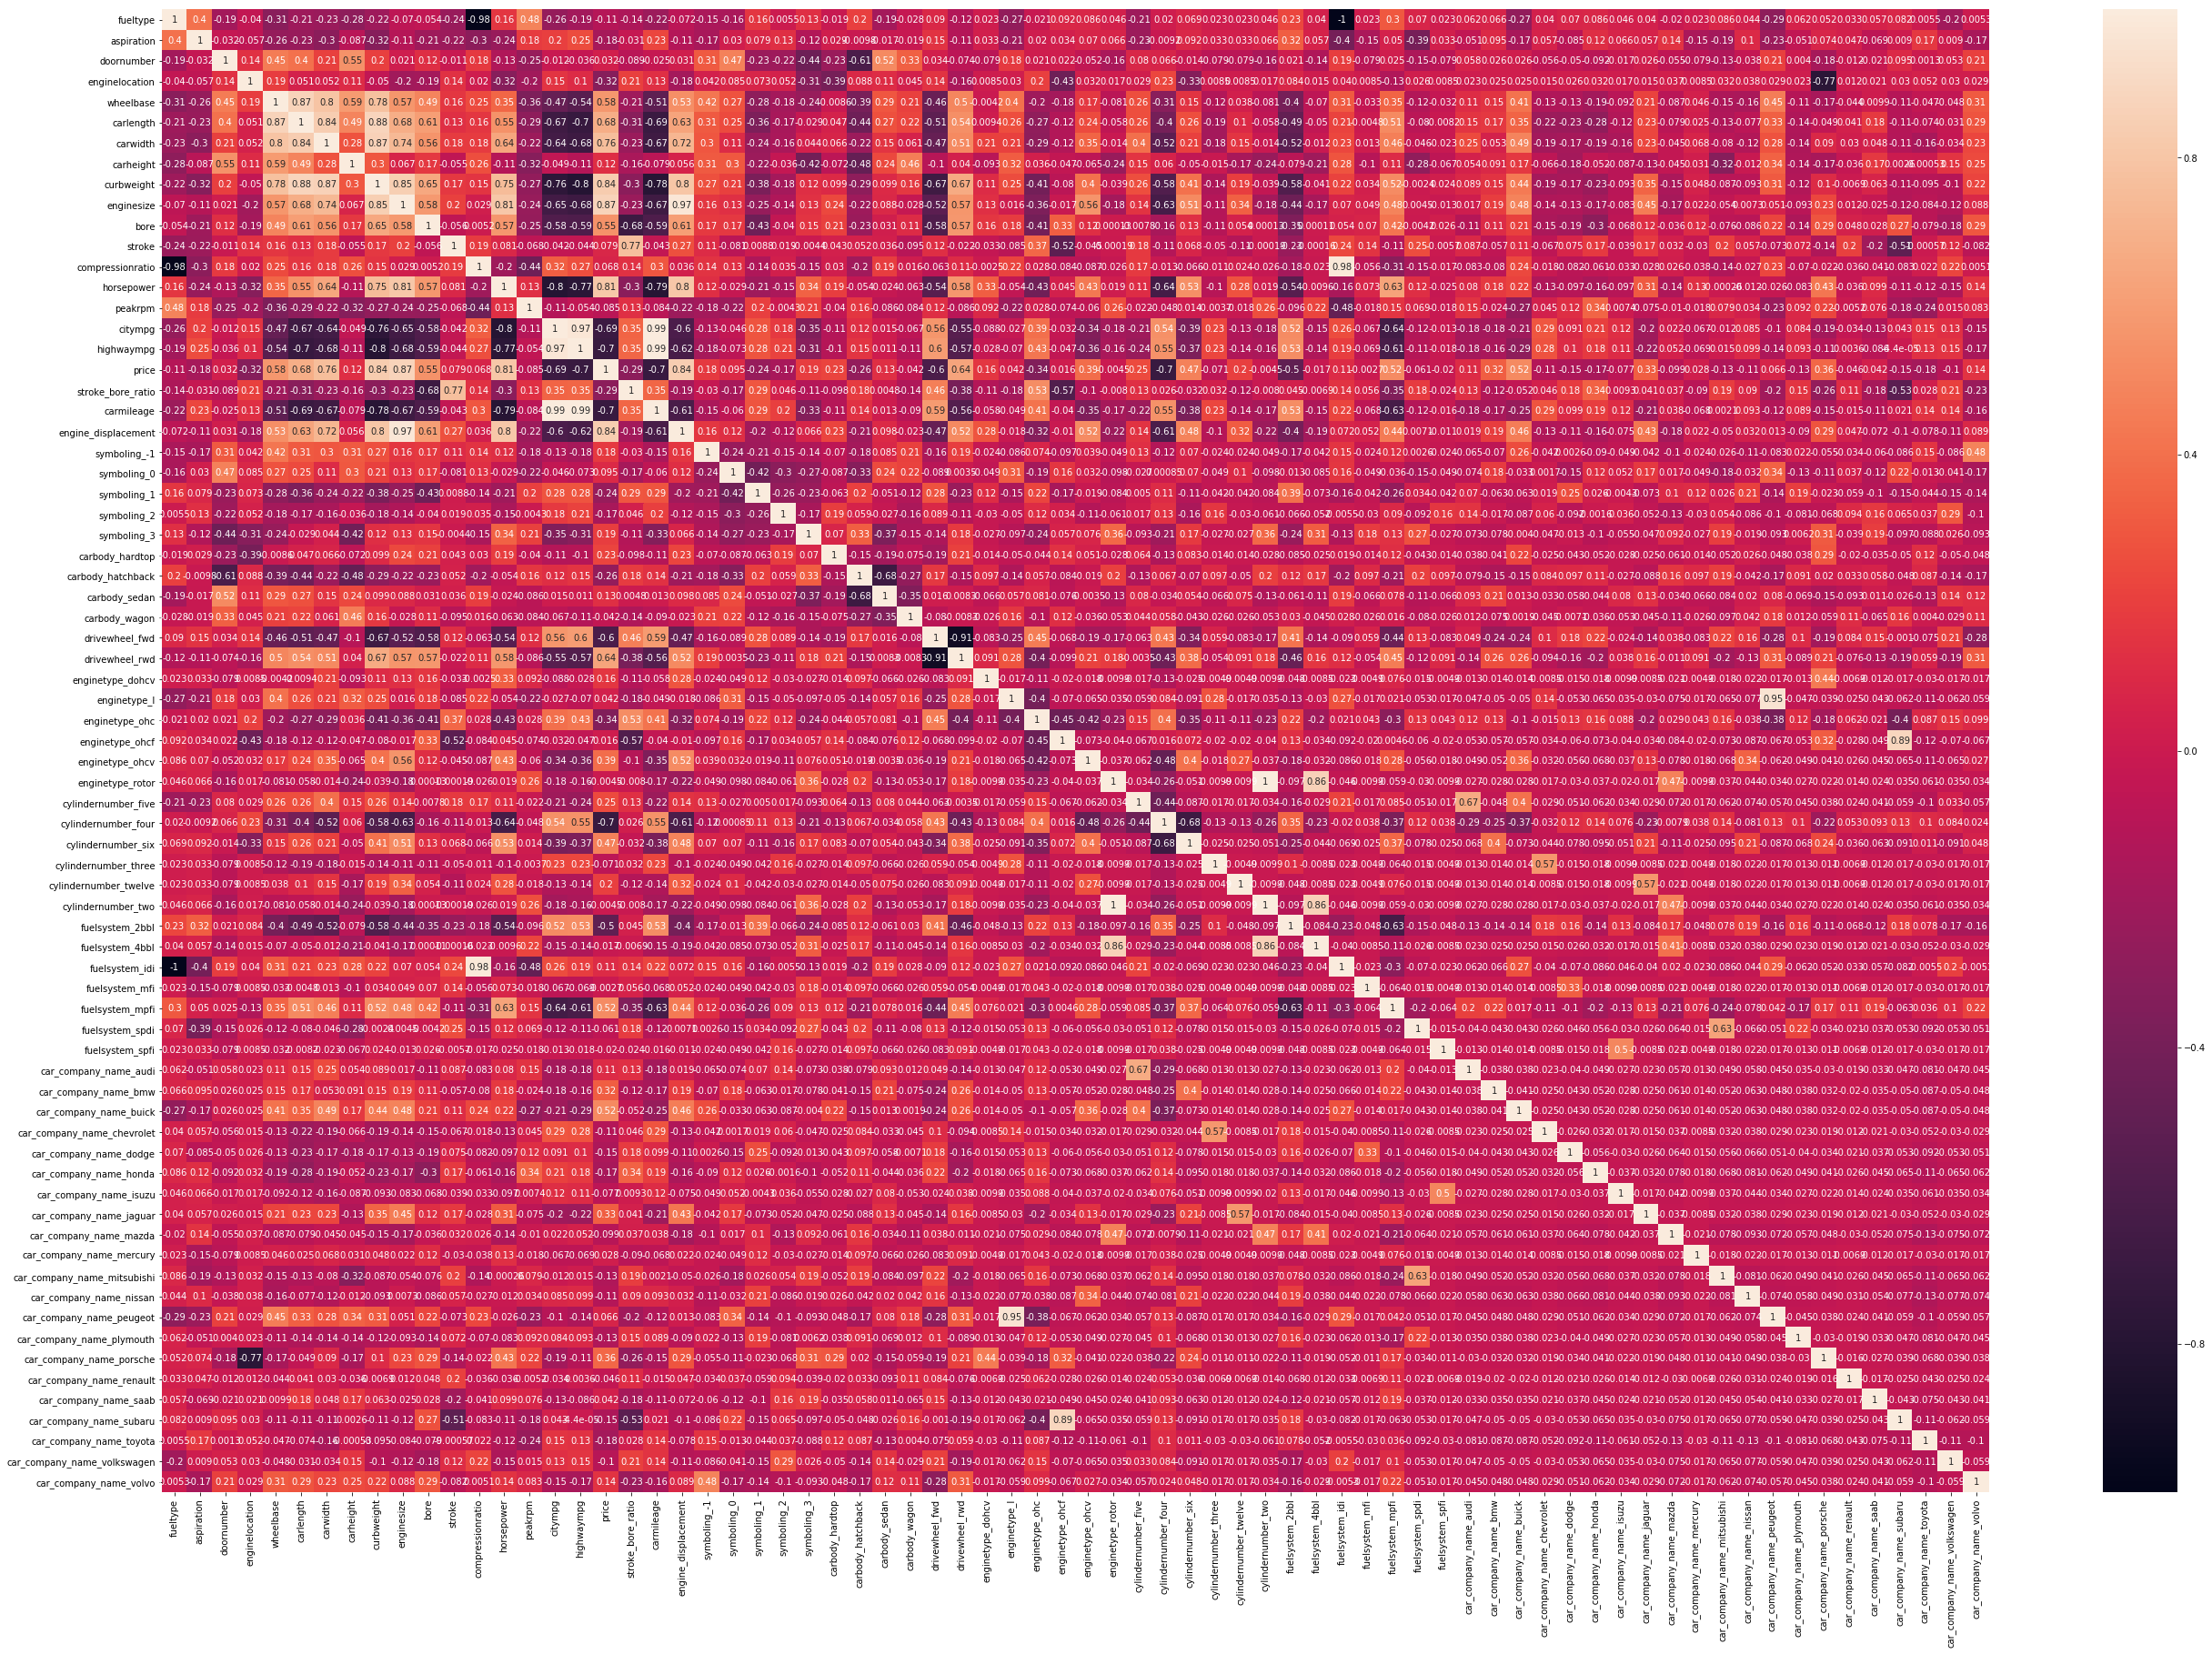

In [50]:
# 13 variables such as fuel type,citympg have a VIF value of inf(infinity), 
# Looking at the correlation matrix
plt.figure(figsize = (45,30))        # Size of the figure
sns.heatmap(car_df.corr(),annot = True)

In [51]:
##Removing variables with VIF value - inf
#fueltype - compressionratio(-0.98)
#citympg and highwaympg have 0.99 coorelation with - carmileage
#enginetype_ohcf  - car_company_name_subaru(0.89)
#enginetype_l  - car_company_name_peugeot(0.95)
#cylindernumber_two - enginetype_rotor (1)
#fuelsystem_idi - compression ratio(0.98)

#Dropping fueltype,citympg,highwaympg,car_company_name_subaru,car_company_name_peugeot,enginetype_rotor and compressionratio
X_train = X_train.drop(['fueltype','citympg','highwaympg','car_company_name_subaru','car_company_name_peugeot','enginetype_rotor','compressionratio'], axis=1)
#Copy the car_df to master_df 
master_df = car_df
car_df = car_df.drop(['fueltype','citympg','highwaympg','car_company_name_subaru','car_company_name_peugeot','enginetype_rotor','compressionratio'], axis=1)

# Calculating Vif value to check if there are any other column needed to be fixed for Multicollinearity
vif_cal(input_data=car_df, dependent_col="price")

Var      Vif
10                       stroke  2930.07
13            stroke_bore_ratio  2717.72
15          engine_displacement  2689.37
9                          bore  2136.11
33          cylindernumber_four  1290.96
8                    enginesize   825.39
2                enginelocation   680.31
7                    curbweight   273.05
4                     carlength   209.71
11                   horsepower   172.76
5                      carwidth   127.41
3                     wheelbase   107.33
42              fuelsystem_mpfi    75.18
37           cylindernumber_two    74.02
29               enginetype_ohc    72.97
34           cylindernumber_six    71.11
14                   carmileage    70.53
32          cylindernumber_five    55.55
6                     carheight    54.49
17                  symboling_0    49.22
38              fuelsystem_2bbl    47.95
23                carbody_sedan    43.89
18                  symboling_1    43.55
12                      peakrpm    42.03
0                    aspiration    40.01
61      car_company_name_toyota    32.24
26               drivewheel_rwd    31.49
25               drivewheel_fwd    29.95
19                  symboling_2    27.62
22            carbody_hatchback    27.37
..                          ...      ...
47       car_company_name_buick    19.52
40               fuelsystem_idi    18.50
53       car_company_name_mazda    18.18
30              enginetype_ohcf    16.68
46         car_company_name_bmw    16.62
35         cylindernumber_three    16.46
62  car_company_name_volkswagen    16.18
55  car_company_name_mitsubishi    15.91
28                 enginetype_l    15.85
58     car_company_name_porsche    13.44
45        car_company_name_audi    13.33
24                carbody_wagon    13.04
27             enginetype_dohcv    12.59
16                 symboling_-1    11.35
49       car_company_name_dodge    11.04
60        car_company_name_saab    10.43
52      car_company_name_jaguar    10.14
43              fuelsystem_spdi     9.70
1                    doornumber     9.18
57    car_company_name_plymouth     8.61
36        cylindernumber_twelve     7.98
31              enginetype_ohcv     7.25
39              fuelsystem_4bbl     6.33
51       car_company_name_isuzu     6.05
48   car_company_name_chevrolet     5.37
59     car_company_name_renault     3.92
21              carbody_hardtop     3.88
54     car_company_name_mercury     2.89
44              fuelsystem_spfi     2.51
41               fuelsystem_mfi     2.28

[64 rows x 2 columns]

In [52]:
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1_updated = sm.OLS(y_train,X_train).fit()
#Summary of our first linear model
print(lm_1_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     59.69
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.20e-48
Time:                        20:21:45   Log-Likelihood:                 305.91
No. Observations:                 143   AIC:                            -487.8
Df Residuals:                      81   BIC:                            -304.1
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Model lm_1 and lm_1_updated:
- Model lm_1 has R-squared = 0.979 , Adj. R-squared = 0.962 which is very good model

- 13 variables such as fuel type,citympg have a VIF value of inf(infinity), seem to have a very high multi-collinearity - so removing some to variables based on coorelation matrix .

- Model lm_1_updated is created after removing the variables with high Multicollinearity and the model has almost the same R-squared (0.978) and Adj. R-squared(0.962) value as model lm_1.

- Model lm_1_updated is very good with R-squared = 0.978 , Adj. R-squared = 0.962 but we will continue to reduce the number of variables which don't add much value in order to make it model more simpler

- There are still independent variables with multicollinearity issues , will run RFE till 15 variables which should be able to remove the variables with high VIF and if not then manually fix the issues by removing variables with high VIF 

## RFE  - Building Model lm_2 with RFE with 30 variables

In [53]:
# Running RFE with the output number of the variable equal to 30
lm_2 = LinearRegression()
rfe_30 = RFE(lm_2, 30)             # running RFE
rfe_30 = rfe_30.fit(X_train, y_train)
print(rfe_30.support_)           # Printing the boolean results
print(rfe_30.ranking_)  

[False False False  True  True False  True  True  True  True  True  True
 False False False False  True False False False False False False False
 False False False False  True  True False False False  True  True  True
  True  True  True False False False False False False False False  True
 False  True  True  True  True  True  True False  True  True  True  True
  True False  True False False]
[36 19 27  1  1 11  1  1  1  1  1  1 28 10  3 25  1  4  8  7  6  5 16 15
 18 17 32 24  1  1 22 23 12  1  1  1  1  1  1 26 14 30 34 31 29 33 21  1
 20  1  1  1  1  1  1 35  1  1  1  1  1 13  1  2  9]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [54]:
##Building the model with RFE with 30 variables
# Get the selected Columns for RFE with 30 Variables
col = X_train.columns[rfe_30.support_]
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm_2= sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Summary of our linear model with 30 variables
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     89.51
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.05e-65
Time:                        20:21:45   Log-Likelihood:                 262.32
No. Observations:                 143   AIC:                            -462.6
Df Residuals:                     112   BIC:                            -370.8
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [55]:
#VIF Values
print(X_train.columns[~rfe_30.support_])

# Calculating Vif value
vif_cal(input_data=car_df.drop(['aspiration', 'doornumber', 'carlength', 'horsepower',
                               'peakrpm', 'stroke_bore_ratio', 'carmileage', 'symboling_-1',
                               'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
                               'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
                               'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc',
                               'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_2bbl',
                               'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
                               'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
                               'car_company_name_audi', 'car_company_name_buick',
                               'car_company_name_mercury', 'car_company_name_saab',
                               'car_company_name_volkswagen', 'car_company_name_volvo'], axis=1), dependent_col="price")

Index(['const', 'aspiration', 'doornumber', 'carlength', 'horsepower',
       'peakrpm', 'stroke_bore_ratio', 'carmileage', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'car_company_name_audi', 'car_company_name_buick',
       'car_company_name_mercury', 'car_company_name_saab',
       'car_company_name_volkswagen', 'car_company_name_volvo'],
      dtype='object')


Var     Vif
8           engine_displacement  676.18
12          cylindernumber_four  332.48
5                    enginesize  244.19
0                enginelocation  238.03
6                          bore  155.10
7                        stroke  102.80
2                      carwidth   87.29
4                    curbweight   83.49
1                     wheelbase   45.88
3                     carheight   27.95
13           cylindernumber_six   17.02
16           cylindernumber_two   17.00
11          cylindernumber_five   14.04
27     car_company_name_porsche    5.01
14         cylindernumber_three    4.75
9              enginetype_dohcv    3.66
22      car_company_name_jaguar    2.80
15        cylindernumber_twelve    2.78
29      car_company_name_toyota    2.54
24  car_company_name_mitsubishi    2.32
10                 enginetype_l    2.23
20       car_company_name_honda    2.13
25      car_company_name_nissan    2.12
23       car_company_name_mazda    2.03
19       car_company_name_dodge    1.95
18   car_company_name_chevrolet    1.80
17         car_company_name_bmw    1.71
26    car_company_name_plymouth    1.68
21       car_company_name_isuzu    1.37
28     car_company_name_renault    1.24

## Model lm_2 :
- Model lm_2 has R-squared = 0.960 , Adj. R-squared = 0.949 which is very good and is almost similar to lm_1_updated but with only 30 variables , we will continue to reduce the number of variable which don't add much value in order to make it model more simpler

### RFE  - Building Model lm_3 with RFE with 15 variables

In [56]:
# Running RFE with the output number of the variable equal to 15
lm_3 = LinearRegression()
rfe_15 = RFE(lm_3, 15)             # running RFE
rfe_15 = rfe_15.fit(X_train, y_train)
print(rfe_15.support_)           # Printing the boolean results
print(rfe_15.ranking_) 

##Building the model with RFE with 15 variables
# Get the selected Columns for RFE with 15 Variables
col = X_train.columns[rfe_15.support_]
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Summary of our linear model with 15 variables
print(lm_3.summary())

[False False False  True False False  True False  True  True  True  True
 False False False False  True False False False False False False False
 False False False False  True False False False False  True  True False
  True  True  True False False False False False False False False  True
 False False False False False False False False False False False  True
 False False False False False]
[51 34 42  1  9 26  1  5  1  1  1  1 43 25 18 40  1 19 23 22 21 20 31 30
 33 32 47 39  1  3 37 38 27  1  1  2  1  1  1 41 29 45 49 46 44 48 36  1
 35 12 10 13 16  7 14 50  6 15  8  1  4 28 11 17 24]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     118.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.72e-67
Time:    

In [57]:
#VIF
print(X_train.columns[~rfe_15.support_])
# Calculating Vif value
vif_cal(input_data=car_df.drop(['aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'horsepower', 'peakrpm', 'stroke_bore_ratio', 'carmileage',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_name_audi',
       'car_company_name_buick', 'car_company_name_chevrolet',
       'car_company_name_dodge', 'car_company_name_honda',
       'car_company_name_isuzu', 'car_company_name_jaguar',
       'car_company_name_mazda', 'car_company_name_mercury',
       'car_company_name_mitsubishi', 'car_company_name_nissan',
       'car_company_name_plymouth', 'car_company_name_renault',
       'car_company_name_saab', 'car_company_name_toyota',
       'car_company_name_volkswagen', 'car_company_name_volvo'], axis=1), dependent_col="price")

Index(['const', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'horsepower', 'peakrpm', 'stroke_bore_ratio', 'carmileage',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_name_audi',
       'car_company_name_buick', 'car_company_name_chevrolet',
       'car_company_name_dodge', 'car_company_name_honda',
       'car_company_name_isuzu', 'car_company_name_jaguar',
       'car_company_name_mazda', 'car_company_name_mercury',
       'car_company_name_mitsubishi', 'car_company_name_nissan',
       'car_company_name_plymouth', 'car_company_name_ren

Var     Vif
6        engine_displacement  388.05
3                 enginesize  200.27
4                       bore   68.99
0             enginelocation   59.11
9        cylindernumber_four   52.15
2                 curbweight   51.99
5                     stroke   48.96
1                   carwidth   44.81
12        cylindernumber_two    4.77
7           enginetype_dohcv    3.11
8        cylindernumber_five    2.93
11     cylindernumber_twelve    2.01
14  car_company_name_porsche    1.90
10      cylindernumber_three    1.46
13      car_company_name_bmw    1.32

## Model lm_3 :
- Model lm_3 has R-squared = 0.933 , Adj. R-squared = 0.926 which is slight less than lm_2 but still very good and is simpler as it has 15 variables lesser.
- Now will try to simplify the model manually 

# Manually processing to simplify the model 

###  We can see from above model statistics that there are 2 variables wiht p value greater than 0.02 - > "enginetype_dohcv"  and "engine_displacement" so dropping  enginetype_dohcv since its p value is highest at 0.218 and  VIF value is more tha  3

### Dropping the Variable and Updating the Model 
- Model lm_4 

In [58]:
#Model lm_4

#Getting the selected columns in the model lm_3
col = X_train.columns[rfe_15.support_]
# Keeping the selected columns in the training set
X_train = X_train[col]
X_train = X_train.drop('enginetype_dohcv',axis=1)
X_train = sm.add_constant(X_train)
lm_4 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 14 variables
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     126.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.76e-68
Time:                        20:21:45   Log-Likelihood:                 225.16
No. Observations:                 143   AIC:                            -420.3
Df Residuals:                     128   BIC:                            -375.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [59]:
# Calculating Vif value
#Storing selected columns in model in a seperate dataframe for furthe vif calculation
select_col_df = car_df.loc[:,['enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'bore', 'stroke', 'engine_displacement',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'car_company_name_bmw',
       'car_company_name_porsche','price']]
vif_cal(input_data=select_col_df, dependent_col="price")


Var     Vif
6        engine_displacement  186.74
3                 enginesize   99.57
0             enginelocation   59.04
4                       bore   53.54
8        cylindernumber_four   49.02
2                 curbweight   48.53
1                   carwidth   44.70
5                     stroke   34.66
11        cylindernumber_two    4.24
7        cylindernumber_five    2.92
10     cylindernumber_twelve    1.86
13  car_company_name_porsche    1.71
9       cylindernumber_three    1.44
12      car_company_name_bmw    1.32

## Since "engine_displacement" has p value (0.127) greater than 0.05 and VIF value is also high at 186.74 so dropping "engine_displacement" variable

### Dropping the Variable and Updating the Model 
- Model lm_5 

In [60]:
#Model lm_5
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('engine_displacement',axis=1)
X_train = sm.add_constant(X_train)
lm_5 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 13 variables
print(lm_5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.35e-68
Time:                        20:21:45   Log-Likelihood:                 223.86
No. Observations:                 143   AIC:                            -419.7
Df Residuals:                     129   BIC:                            -378.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [61]:
# Calculating Vif value
vif_cal(input_data=select_col_df.drop(["engine_displacement"], axis=1), dependent_col="price")

Var    Vif
0             enginelocation  51.01
3                 enginesize  42.94
2                 curbweight  41.85
1                   carwidth  41.72
4                       bore  34.05
7        cylindernumber_four  31.98
5                     stroke  22.30
10        cylindernumber_two   2.68
6        cylindernumber_five   2.42
9      cylindernumber_twelve   1.58
12  car_company_name_porsche   1.50
8       cylindernumber_three   1.32
11      car_company_name_bmw   1.30

## Since all the remaining variables are significant with p value less than equal to  0.02 so taking VIF metrics into consideration and dropping 'enginelocation' variable as it has very high VIF value of 51.01

### Dropping the Variable and Updating the Model
- Model lm_6

In [62]:
#Model lm_6
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('enginelocation',axis=1)
X_train = sm.add_constant(X_train)
lm_6 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 12 variables
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.77e-66
Time:                        20:21:46   Log-Likelihood:                 216.29
No. Observations:                 143   AIC:                            -406.6
Df Residuals:                     130   BIC:                            -368.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [63]:
# Calculating Vif value
vif_cal(input_data=select_col_df.drop(["engine_displacement","enginelocation"], axis=1), dependent_col="price")

Var    Vif
1                 curbweight  41.76
2                 enginesize  40.80
0                   carwidth  37.36
3                       bore  33.70
6        cylindernumber_four  20.58
4                     stroke  20.07
5        cylindernumber_five   2.29
9         cylindernumber_two   2.29
8      cylindernumber_twelve   1.57
11  car_company_name_porsche   1.36
10      car_company_name_bmw   1.18
7       cylindernumber_three   1.13

## Since all the remaining variables are significant with p value less than equal to  0.02 so taking VIF metrics into consideration and dropping 'curbweight' variable as it has very high VIF value of 41.76

### Dropping the Variable and Updating the Model
- Model lm_7

In [64]:
#Model lm_7
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('curbweight',axis=1)
X_train = sm.add_constant(X_train)
lm_7 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 11 variables
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.18e-65
Time:                        20:21:46   Log-Likelihood:                 210.06
No. Observations:                 143   AIC:                            -396.1
Df Residuals:                     131   BIC:                            -360.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [65]:
# Calculating Vif value
vif_cal(input_data=select_col_df.drop(["engine_displacement","enginelocation",
                                       "curbweight"], axis=1), dependent_col="price")

Var    Vif
1                 enginesize  36.21
2                       bore  31.14
0                   carwidth  25.46
5        cylindernumber_four  20.22
3                     stroke  20.05
4        cylindernumber_five   2.29
8         cylindernumber_two   2.29
7      cylindernumber_twelve   1.56
10  car_company_name_porsche   1.26
9       car_company_name_bmw   1.18
6       cylindernumber_three   1.13

## Since all the remaining variables are significant with p value less than equal to  0.02 so taking VIF metrics into consideration and dropping 'enginesize' variable as it has very high VIF value of 36.21

### Dropping the Variable and Updating the Model

- Model lm_8

In [66]:
#Model lm_8
# Dropping highly correlated variables and insignificant variables
X_train_copy = X_train
X_train = X_train.drop('enginesize',axis=1)
X_train = sm.add_constant(X_train)
lm_8 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 10 variables
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     74.76
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.09e-49
Time:                        20:21:46   Log-Likelihood:                 167.85
No. Observations:                 143   AIC:                            -313.7
Df Residuals:                     132   BIC:                            -281.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [67]:
#Since There is large drop in R-squared and Adj. R-squared and only VIF value was 
#involved so trying with next highest VIF variable
#Model lm_8
# Dropping highly correlated variables and insignificant variables
X_train = X_train_copy
X_train = X_train.drop('bore',axis=1)
X_train = sm.add_constant(X_train)
lm_8 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 10 variables
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.14e-60
Time:                        20:21:46   Log-Likelihood:                 196.18
No. Observations:                 143   AIC:                            -370.4
Df Residuals:                     132   BIC:                            -337.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [68]:
#Since  by removig bore the reduction in R Squared and Adj. R Squared value is very less compared to 
# removing enginesize, hence deciding to retain engine size and drop 'bore' variable

In [69]:
# Calculating Vif value
vif_cal(input_data=select_col_df.drop(["engine_displacement","enginelocation",
                                       "curbweight","bore"], axis=1), dependent_col="price")

Var    Vif
0                  carwidth  24.84
1                enginesize  20.73
2                    stroke  15.87
4       cylindernumber_four   9.21
3       cylindernumber_five   2.12
7        cylindernumber_two   1.59
6     cylindernumber_twelve   1.33
9  car_company_name_porsche   1.16
8      car_company_name_bmw   1.14
5      cylindernumber_three   1.05

## Dropping cylindernumber_four as it has highest pvalue in the model and VIF is also higher than 3

### Dropping the Variable and Updating the Model

- Model lm_9

In [70]:
#Model lm_9
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('cylindernumber_four',axis=1)
X_train = sm.add_constant(X_train)
lm_9 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 9 variables
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.29e-61
Time:                        20:21:46   Log-Likelihood:                 195.87
No. Observations:                 143   AIC:                            -371.7
Df Residuals:                     133   BIC:                            -342.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [71]:
# Calculating Vif value
vif_cal(input_data=select_col_df.drop(["engine_displacement","enginelocation",
                                       "curbweight","bore",
                                       "cylindernumber_four"], axis=1), dependent_col="price")

Var    Vif
0                  carwidth  16.77
1                enginesize  10.89
2                    stroke   7.27
5     cylindernumber_twelve   1.25
3       cylindernumber_five   1.23
8  car_company_name_porsche   1.16
7      car_company_name_bmw   1.13
6        cylindernumber_two   1.12
4      cylindernumber_three   1.02

## Removing variable 'stroke' as it is the only variable to has p value greater  than 0.2 and also VIF greater than 3. There are other variable like cylindernumber_four which  has high pvalue but its VIF is less then 3.

### Dropping the Variable and Updating the Model

- Model lm_10

In [72]:
#Model lm_10
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('stroke',axis=1)
X_train = sm.add_constant(X_train)
lm_10 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 8 variables
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.06e-61
Time:                        20:21:46   Log-Likelihood:                 193.36
No. Observations:                 143   AIC:                            -368.7
Df Residuals:                     134   BIC:                            -342.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [73]:
# Calculating Vif value
vif_cal(input_data=select_col_df.drop(["engine_displacement","enginelocation",
                                       "curbweight","bore",
                                       "cylindernumber_four","stroke"], axis=1), dependent_col="price")

Var    Vif
1                enginesize  10.89
0                  carwidth  10.35
4     cylindernumber_twelve   1.20
2       cylindernumber_five   1.19
6      car_company_name_bmw   1.13
7  car_company_name_porsche   1.13
5        cylindernumber_two   1.12
3      cylindernumber_three   1.00

## Dropping variable 'cylindernumber_twelve' since it is high p value greater than 0.02 and there are no other variables with both high p value and VIF

### Dropping the Variable and Updating the Model

- Model lm_11

In [74]:
#Model lm_11
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('cylindernumber_twelve',axis=1)
X_train = sm.add_constant(X_train)
lm_11 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 7 variables
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     160.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.32e-62
Time:                        20:21:46   Log-Likelihood:                 191.84
No. Observations:                 143   AIC:                            -367.7
Df Residuals:                     135   BIC:                            -344.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
#Calculating Vif value
vif_cal(input_data=select_col_df.drop(["engine_displacement","enginelocation",
                                       "curbweight","bore",
                                       "cylindernumber_four","stroke",
                                      "cylindernumber_twelve"], axis=1), dependent_col="price")

Var   Vif
0                  carwidth  9.31
1                enginesize  9.26
2       cylindernumber_five  1.19
4        cylindernumber_two  1.11
5      car_company_name_bmw  1.11
6  car_company_name_porsche  1.11
3      cylindernumber_three  1.00

## Dropping variable 'cylindernumber_three' since it is high p value greater than 0.02 and there are no other variables with both high p value and VIF

### Dropping the Variable and Updating the Model

- Model lm_12

In [76]:
#Model lm_12
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('cylindernumber_three',axis=1)
X_train = sm.add_constant(X_train)
lm_12 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 6 variables
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.39e-62
Time:                        20:21:46   Log-Likelihood:                 189.38
No. Observations:                 143   AIC:                            -364.8
Df Residuals:                     136   BIC:                            -344.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [77]:
#Calculating Vif value
vif_cal(input_data=select_col_df.drop(["engine_displacement","enginelocation",
                                       "curbweight","bore",
                                       "cylindernumber_four" , "stroke",
                                      "cylindernumber_twelve","cylindernumber_three"], axis=1), dependent_col="price")

Var   Vif
0                  carwidth  9.31
1                enginesize  9.26
2       cylindernumber_five  1.19
3        cylindernumber_two  1.11
4      car_company_name_bmw  1.11
5  car_company_name_porsche  1.11

## Since p value of all value is low so removing the variable with highest VIF value 'carwidth'

### Dropping the Variable and Updating the Model and VIF

- Model lm_13

In [78]:
#Model lm_13
# Dropping highly correlated variables and insignificant variables
X_train_copy = X_train
X_train = X_train.drop('carwidth',axis=1)
X_train = sm.add_constant(X_train)
lm_13 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 5 variables
print(lm_13.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.83e-58
Time:                        20:21:46   Log-Likelihood:                 176.12
No. Observations:                 143   AIC:                            -340.2
Df Residuals:                     137   BIC:                            -322.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
#Since removing carwidth drops R-squared  and Adj. R-squared significantly trying keeping carwidth and creating 
#new model removing variable 'enginesize' with next high vif to see if we can remove it 

In [80]:
#Model lm_14# Dropping highly correlated variables and insignificant variables
X_train = X_train_copy.drop('enginesize',axis=1)
X_train = sm.add_constant(X_train)
lm_14 = sm.OLS(y_train,X_train).fit()   # Running the linear model
#Summary of our linear model with 5 variables
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     89.82
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.70e-41
Time:                        20:21:46   Log-Likelihood:                 136.16
No. Observations:                 143   AIC:                            -260.3
Df Residuals:                     137   BIC:                            -242.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [81]:
#Since removing enginesize drops R-squared  and Adj. R-squared even more so comapring model lm_12,lm_13 and lm_14 
#Model lm_12 looks the best so choosing it

## So selecting model lm_12 with 6 variables as it contains VIF values less than 10 and p values are also less than 0.02

### Predictions using Model lm_12 on test set

In [82]:
# Adding  constant variable to test dataframe
X_test_with_lm12 = sm.add_constant(X_test)

X_test_with_lm12.columns
# Creating X_test_with_lm12 dataframe 
X_test_with_lm12 = X_test_with_lm12.drop(['fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carheight', 'curbweight',
        'bore', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'stroke_bore_ratio', 'carmileage',
       'engine_displacement', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve',  'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'car_company_name_audi',
       'car_company_name_buick', 'car_company_name_chevrolet',
       'car_company_name_dodge', 'car_company_name_honda',
       'car_company_name_isuzu', 'car_company_name_jaguar',
       'car_company_name_mazda', 'car_company_name_mercury',
       'car_company_name_mitsubishi', 'car_company_name_nissan',
       'car_company_name_peugeot', 'car_company_name_plymouth',
       'car_company_name_renault',
       'car_company_name_saab', 'car_company_name_subaru',
       'car_company_name_toyota', 'car_company_name_volkswagen',
       'car_company_name_volvo'], axis=1)

#Making predictions with model lm_13 on Test set
y_pred = lm_12.predict(X_test_with_lm12)


# metrics
r2_score(y_test,y_pred)


0.8734003918740092

In [83]:
#R Squared value with model lm_12 on the test data set is good with 0.87

## Model Evaluation

NameError: name 'y_pred_with_lm14' is not defined

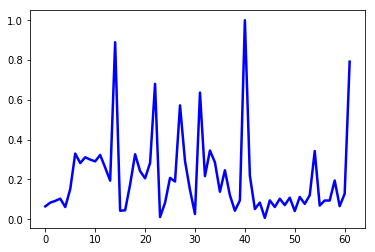

In [84]:
# Actual vs Predicted
c = [i for i in range(0,62,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_with_lm14 , color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

## The fit seems pretty good for Actual vs predicted values

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
# Error terms
fig = plt.figure()
c = [i for i in range(0,62,1)]
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [ ]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

### Distribution of the error is looking more and more gaussian ,distribution around 0 and seems sort of symmetrical on both sides around 0 and there does not seem to be any pattern

In [ ]:
import numpy as np
from sklearn import metrics
print('RMSE (Root Mean Square Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Inference: Model lm_12 is selected

Model Interpretation : 
In  the selected Model there are six variable 
    
Buisness Objectives :

1.To identify the variables which are significant in predicting the price of a car :

There are 6 variables as per our model which significantly influence the price of Car 

- +Ive Coefficients :
1 enginesize : With increase in engine size price also increase
2 carwidth : As car width increases the pice of car increase
3 car_company_name_bmw
4 car_company_name_porsche
5 cylindernumber_two
6 cylindernumber_five


Since Chinese automobile company Geely Auto aspires to launch it's own car model SO car_company_name_bmw and car_company_name_porsche might not be variables something company could do about directly to influence its on product prices but can study these companies and undertand teh reason the get premium or +ively effect the price of the car.



2.To create a linear model that quantitatively relates car price with available independent variables
lm_12 is th linear model we have create above and has been selected for the predictions. 

3.To know the accuracy of the model, i.e. how well these variables can describe the car price.
R-squared:                       0.889
Adj. R-squared:                  0.884
So the selected model explains nearly 89% variance in the data which is pretty good.
